2586.769647563161


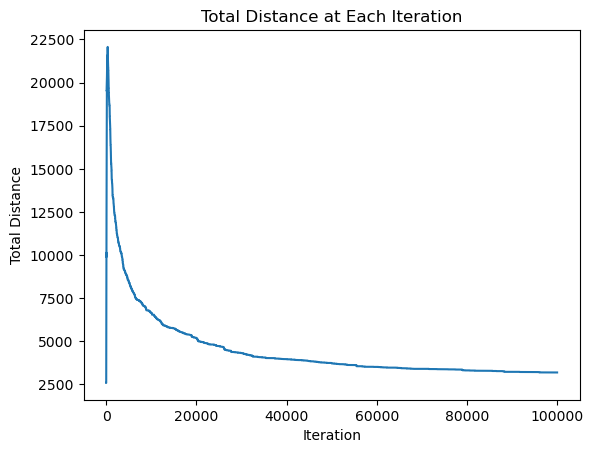

([1,
  2,
  242,
  243,
  244,
  241,
  240,
  239,
  238,
  237,
  236,
  235,
  234,
  233,
  232,
  231,
  246,
  245,
  247,
  250,
  251,
  230,
  229,
  228,
  227,
  226,
  225,
  224,
  223,
  222,
  221,
  220,
  219,
  218,
  217,
  216,
  215,
  214,
  213,
  212,
  211,
  210,
  207,
  206,
  205,
  204,
  203,
  202,
  201,
  198,
  197,
  196,
  195,
  194,
  193,
  192,
  191,
  190,
  189,
  188,
  187,
  186,
  185,
  184,
  183,
  182,
  181,
  176,
  180,
  179,
  150,
  178,
  177,
  151,
  152,
  156,
  153,
  155,
  154,
  129,
  130,
  131,
  20,
  21,
  128,
  127,
  126,
  125,
  124,
  123,
  122,
  121,
  120,
  119,
  157,
  158,
  159,
  160,
  175,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  172,
  171,
  173,
  174,
  107,
  106,
  105,
  104,
  103,
  102,
  101,
  100,
  99,
  98,
  97,
  96,
  95,
  94,
  93,
  92,
  91,
  90,
  89,
  109,
  108,
  110,
  111,
  112,
  88,
  87,
  113,
  114,
  115,
  117,
  116,
  86,
  85,

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
import random
import math
import re

def read_tsp_file(filename):
    with open(filename, 'r') as file:
        lines = file.read().splitlines()
    coordinates = {}
    for line in lines:
        if line.startswith('NODE_COORD_SECTION'):
            break
    for line in lines[lines.index('NODE_COORD_SECTION') + 1:]:
        if line.strip() == 'EOF':
            break
        parts = line.split()
        coordinates[int(parts[0])] = (float(parts[1]), float(parts[2]))
    return coordinates

def read_tour_file(filename):
    with open(filename, 'r') as file:
        lines = file.read().splitlines()
    tour = []
    for line in lines:
        if line.startswith('TOUR_SECTION'):
            break
    for line in lines[lines.index('TOUR_SECTION') + 1:]:
        if line.strip() == '-1' or re.match(r'EOF', line.strip()):
            break
        tour.append(int(line.strip()))
    return tour
'''
# Example usage
tsp_coordinates = read_tsp_file('a280.tsp.txt')
initial_tour = read_tour_file('a280.opt.tour.txt')

print(tsp_coordinates)
print(initial_tour)
'''
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Function to calculate the total distance of the tour
def calculate_total_distance(tour, coordinates):
    total_distance = 0
    for i in range(-1, len(tour) - 1):
        total_distance += euclidean_distance(coordinates[tour[i]], coordinates[tour[i + 1]])
    return total_distance

# Function to perform the 2-opt move
def two_opt(route, i, k):
    new_route = route[:i] + route[i:k+1][::-1] + route[k+1:]
    return new_route
def stochastic_annealing_2opt(coordinates, initial_route, cooling_rate, number_of_iterations):
    current_route = initial_route
    best_route = initial_route[:]
    current_distance = calculate_total_distance(current_route, coordinates)
    best_distance = current_distance
    temperature = max([euclidean_distance(coordinates[i], coordinates[j]) 
                       for i in coordinates for j in coordinates])

    # Store the distances at each iteration
    distances = [current_distance]

    for iteration in range(number_of_iterations):
        # Perform 2-opt on the route
        i, k = sorted(random.sample(range(1, len(current_route) - 1), 2))
        new_route = two_opt(current_route, i, k)
        new_distance = calculate_total_distance(new_route, coordinates)

        delta_distance = new_distance - current_distance

        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_route = new_route
            current_distance = new_distance

            if new_distance < best_distance:
                best_route = new_route
                best_distance = new_distance

        distances.append(current_distance)

        # Cooling schedules
        # Adjust the temperature using a normal distribution
        temperature *= cooling_rate * np.random.normal(1, 0.1)

        # Reintroduce some heat periodically to avoid local minima
        if iteration % 100 == 0:
            temperature *= 1.1  # Increase the temperature by 10% every 100 iterations

    return best_route, best_distance, distances

coordinates = read_tsp_file('a280.tsp.txt')
initial_route = read_tour_file('a280.opt.tour.txt')

print(calculate_total_distance(initial_route, coordinates))

# Stochastic Annealing parameters
cooling_rate = 0.995
number_of_iterations = 100000  # The number of iterations can be tuned

# Apply Stochastic Annealing to the TSP instance
best_route, best_distance, distances = stochastic_annealing_2opt(coordinates, initial_route, cooling_rate, number_of_iterations)

plt.plot(distances)
plt.xlabel('Iteration')
plt.ylabel('Total Distance')
plt.title('Total Distance at Each Iteration')
plt.show()

best_route, best_distance